<h1 align="center"> MA_Feedback Timing -Inclusion & Exclusion Stages</h1>

# 1- Import Libraries

In [24]:
# Third-Party Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# 2- Set Directory

In [6]:
main_path= 'YOUR_PATH'
os.chdir(main_path)

# 3.a - Import Data : MA_Feedback_Decision Spreadsheet - Relevant_studies.csv

In [25]:
# Combine range and list by converting range to a list and column 20 to 23 
columns_to_use = list(range(0, 14)) + [15, 16, 17 , 18,19,20,21,24,25,26,27] + list(range(31, 56))
# read in the data with the columns we want to use
data_all = pd.read_csv('MA_Feedback_DecisionSpreadsheet_Relevant_studies.csv')


# 4 - Double Screener Correlation

## 4.a-Title-Abstract correlation with double screener

In [26]:
# column names of data_all
data_all.columns

# relevant_studies_double_screened_titleabstract is the one where Title_screener_2= 'LG'
relevant_studies_double_screened_titleabstract = data_all[data_all['Title_screener_2'] == 'LG']

#####################
# TITLE ONLY

import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load your data (replace with your file path or data source)
# df = pd.read_csv("your_data.csv")

# Assuming 'Title_Screener' and 'Title_Screener_2' are the two columns with ratings
title_screener_1 = relevant_studies_double_screened_titleabstract['\nTitle Decision']
title_screener_2 = relevant_studies_double_screened_titleabstract['Title_screener_2_decision']

# turn 'yes' to 1 and 'no' to 0 in title_screener_1 and title_screener_2
title_screener_1 = title_screener_1.replace('yes', 1)
title_screener_1 = title_screener_1.replace('no', 0)
title_screener_2 = title_screener_2.replace('yes', 1)
title_screener_2 = title_screener_2.replace('no', 0)

# merge the two columns and from this merged, remove the rows with missing values
title_s = pd.concat([title_screener_1, title_screener_2], axis=1)
title_s = title_s.dropna()

# Extract the two columns from the merged data
title_screener_1 = title_s[title_s.columns[0]]
title_screener_2 = title_s[title_s.columns[1]]

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(title_screener_1, title_screener_2)

print(f"Cohen's Kappa for Title Screening: {kappa:.3f}")

#####################

# TITLE and abstracts

import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load your data (replace with your file path or data source)
# df = pd.read_csv("your_data.csv")

# Assuming 'Title_Screener' and 'Title_Screener_2' are the two columns with ratings
titleabstract_screener_1 = relevant_studies_double_screened_titleabstract['Abstract_screening_decision1']
titleabstract_screener_2 = relevant_studies_double_screened_titleabstract['Abstract_screener_2_decision']

# if blank, fill with 'no'
titleabstract_screener_1 = titleabstract_screener_1.fillna('no')
titleabstract_screener_2 = titleabstract_screener_2.fillna('no')

# turn 'yes' to 1 and 'no' to 0 in titleabstract_screener_1 and titleabstract_screener_2
titleabstract_screener_1 = titleabstract_screener_1.replace('yes', 1)
titleabstract_screener_1 = titleabstract_screener_1.replace('no', 0)
titleabstract_screener_2 = titleabstract_screener_2.replace('yes', 1)
titleabstract_screener_2 = titleabstract_screener_2.replace('no', 0)

# merge the two columns and from this merged, remove the rows with missing values
title_abstract_s = pd.concat([titleabstract_screener_1, titleabstract_screener_2], axis=1)
title_abstract_s = title_abstract_s.dropna()


# Extract the two columns from the merged data
titleabstract_screener_1 = title_abstract_s[title_abstract_s.columns[0]]
titleabstract_screener_2 = title_abstract_s[title_abstract_s.columns[1]]

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(titleabstract_screener_1, titleabstract_screener_2)

print(f"Cohen's Kappa for Title-abstract Screening: {kappa:.3f}")

# confidence interval for kappa without using fleiss
import numpy as np
import scipy.stats as stats

def kappa_ci(p1, p2, n1, n2, alpha=0.05):
    """
    Calculate the confidence interval for Cohen's kappa.
    
    Parameters
    ----------
    p1 : float
        Proportion of agreement between raters 1 and 2.
    p2 : float
        Proportion of agreement expected by chance.
    n1 : int
        Number of ratings by rater 1.
    n2 : int
        Number of ratings by rater 2.
    alpha : float, optional
        Significance level. The default is 0.05.
    
    Returns
    -------
    kappa : float
        Cohen's kappa.
    lower : float
        Lower bound of the confidence interval.
    upper : float
        Upper bound of the confidence interval.
    """
    kappa = (p1 - p2) / (1 - p2)
    se = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / (n1 + n2))
    z = stats.norm.ppf(1 - alpha / 2)
    lower = kappa - z * se
    upper = kappa + z * se
    return kappa, lower, upper

# Proportion of agreement between raters 1 and 2
p1 = (titleabstract_screener_1 == titleabstract_screener_2).mean()

# Proportion of agreement expected by chance
p2 = (titleabstract_screener_1.mean() * titleabstract_screener_2.mean() + (1 - titleabstract_screener_1.mean()) * (1 - titleabstract_screener_2.mean()))

# Number of ratings by rater 1
n1 = titleabstract_screener_1.count()

# Number of ratings by rater 2
n2 = titleabstract_screener_2.count()

# Calculate the confidence interval for Cohen's kappa
kappa, lower, upper = kappa_ci(p1, p2, n1, n2)

print(f"Confidence Interval for Cohen's Kappa: ({lower:.3f}, {upper:.3f})")


# correlation between titleabstract_screener_1 and titleabstract_screener_2
titleabstract_screener_1.corr(titleabstract_screener_2)
print(f"Correlation between Title-abstract Screening: {titleabstract_screener_1.corr(titleabstract_screener_2):.3f}")

# number of titleabstract_screener_1=1 while titleabstract_screener_2=0
titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==0)].count()
print(f"Number of titleabstract_screener_1=yes while titleabstract_screener_2=no: {titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==0)].count()}")

# number of titleabstract_screener_1=0 while titleabstract_screener_2=1
titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==1)].count()
print(f"Number of titleabstract_screener_1=no while titleabstract_screener_2=yes: {titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==1)].count()}")

# number of titleabstract_screener_1=1 while titleabstract_screener_2=1
titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==1)].count()
print(f"Number of titleabstract_screener_1=yes while titleabstract_screener_2=yes: {titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==1)].count()}")

# number of titleabstract_screener_1=0 while titleabstract_screener_2=0
titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==0)].count()
print(f"Number of titleabstract_screener_1=no while titleabstract_screener_2=no: {titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==0)].count()}")


# Calculate the percentage agreement
percentage_agreement = (titleabstract_screener_1 == titleabstract_screener_2).mean()
print(f"Percentage Agreement for Title-abstract Screening: {percentage_agreement:.3f}")
#####################

# Overall

# from relevant_studies_double_screened_titleabstract remove rows in which both \nTitle Decision and Title_screener_2_decision is no
relevant_studies_double_screened_titleabstract = relevant_studies_double_screened_titleabstract[(relevant_studies_double_screened_titleabstract['\nTitle Decision'] != 'no') | (relevant_studies_double_screened_titleabstract['Title_screener_2_decision'] != 'no')]

# Assuming 'Title_Screener' and 'Title_Screener_2' are the two columns with ratings
titleabstract_screener_1 = relevant_studies_double_screened_titleabstract['Abstract_screening_decision1']
titleabstract_screener_2 = relevant_studies_double_screened_titleabstract['Abstract_screener_2_decision']

# if blank, fill with 'no'
titleabstract_screener_1 = titleabstract_screener_1.fillna('no')
titleabstract_screener_2 = titleabstract_screener_2.fillna('no')

# turn 'yes' to 1 and 'no' to 0 in titleabstract_screener_1 and titleabstract_screener_2
titleabstract_screener_1 = titleabstract_screener_1.replace('yes', 1)
titleabstract_screener_1 = titleabstract_screener_1.replace('no', 0)
titleabstract_screener_2 = titleabstract_screener_2.replace('yes', 1)
titleabstract_screener_2 = titleabstract_screener_2.replace('no', 0)

# merge the two columns and from this merged, remove the rows with missing values
title_abstract_s = pd.concat([titleabstract_screener_1, titleabstract_screener_2], axis=1)
title_abstract_s = title_abstract_s.dropna()

# Extract the two columns from the merged data
titleabstract_screener_1 = title_abstract_s[title_abstract_s.columns[0]]
titleabstract_screener_2 = title_abstract_s[title_abstract_s.columns[1]]

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(titleabstract_screener_1, titleabstract_screener_2)

print(f"Cohen's Kappa for Title-abstract Screening: {kappa:.3f}")

# correlation between titleabstract_screener_1 and titleabstract_screener_2
titleabstract_screener_1.corr(titleabstract_screener_2)
print(f"Correlation between Title-abstract Screening: {titleabstract_screener_1.corr(titleabstract_screener_2):.3f}")

# number of titleabstract_screener_1=1 while titleabstract_screener_2=0
titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==0)].count()
print(f"Number of titleabstract_screener_1=yes while titleabstract_screener_2=no: {titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==0)].count()}")

# number of titleabstract_screener_1=0 while titleabstract_screener_2=1
titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==1)].count()
print(f"Number of titleabstract_screener_1=no while titleabstract_screener_2=yes: {titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==1)].count()}")

# number of titleabstract_screener_1=1 while titleabstract_screener_2=1
titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==1)].count()
print(f"Number of titleabstract_screener_1=yes while titleabstract_screener_2=yes: {titleabstract_screener_1[(titleabstract_screener_1==1) & (titleabstract_screener_2==1)].count()}")

# number of titleabstract_screener_1=0 while titleabstract_screener_2=0
titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==0)].count()
print(f"Number of titleabstract_screener_1=no while titleabstract_screener_2=no: {titleabstract_screener_1[(titleabstract_screener_1==0) & (titleabstract_screener_2==0)].count()}")


# Calculate the percentage agreement
percentage_agreement = (titleabstract_screener_1 == titleabstract_screener_2).mean()
print(f"Percentage Agreement for Title-abstract Screening: {percentage_agreement:.3f}")


Cohen's Kappa for Title Screening: 0.475
Cohen's Kappa for Title-abstract Screening: 0.742
Confidence Interval for Cohen's Kappa: (0.725, 0.759)
Correlation between Title-abstract Screening: 0.748
Number of titleabstract_screener_1=yes while titleabstract_screener_2=no: 6
Number of titleabstract_screener_1=no while titleabstract_screener_2=yes: 2
Number of titleabstract_screener_1=yes while titleabstract_screener_2=yes: 12
Number of titleabstract_screener_1=no while titleabstract_screener_2=no: 480
Percentage Agreement for Title-abstract Screening: 0.984
Cohen's Kappa for Title-abstract Screening: 0.719
Correlation between Title-abstract Screening: 0.726
Number of titleabstract_screener_1=yes while titleabstract_screener_2=no: 6
Number of titleabstract_screener_1=no while titleabstract_screener_2=yes: 2
Number of titleabstract_screener_1=yes while titleabstract_screener_2=yes: 12
Number of titleabstract_screener_1=no while titleabstract_screener_2=no: 122
Percentage Agreement for Title

## 4.b- Full-text correlation with double reviewer

In [27]:
# column names of data_all
data_all.columns

# relevant_studies_double_screened_full_text is the one where Fulltext_Reviewer_2= 'EE'
relevant_studies_double_screened_full_text = data_all[data_all['Fulltext_Reviewer_2'] == 'EE']

# Overall

# Assuming 'Title_Screener' and 'Title_Screener_2' are the two columns with ratings
fulltext_reviewer_1 = relevant_studies_double_screened_full_text['Eligibility_decision']
fulltext_reviewer_2 = relevant_studies_double_screened_full_text['Eligibility_decision_Reviewer_2']

# merge them
fulltext_reviewer = pd.concat([fulltext_reviewer_1, fulltext_reviewer_2], axis=1)

# if there is any "pending" in either fulltext_reviewer_1 or fulltext_reviewer_2, remov
fulltext_reviewer_without_pending = fulltext_reviewer[(fulltext_reviewer[fulltext_reviewer.columns[0]] != 'pending') & (fulltext_reviewer[fulltext_reviewer.columns[1]] != 'pending')]

# turn 'yes' to 1 and 'no' to 0 in fulltext_reviewer
fulltext_reviewer_without_pending = fulltext_reviewer_without_pending.replace('yes', 1)
fulltext_reviewer_without_pending = fulltext_reviewer_without_pending.replace('no', 0)

# remove the rows with missing values
fulltext_reviewer_without_pending = fulltext_reviewer_without_pending.dropna()

# Extract the two columns from the merged data
fulltext_reviewer_1 = fulltext_reviewer_without_pending[fulltext_reviewer_without_pending.columns[0]]
fulltext_reviewer_2 = fulltext_reviewer_without_pending[fulltext_reviewer_without_pending.columns[1]]

# Calculate Cohen's Kappa
kappa_fulltext = cohen_kappa_score(fulltext_reviewer_1, fulltext_reviewer_2)

print(f"Cohen's Kappa for Full text reviews: {kappa_fulltext:.3f}")

# confidence interval for Cohen's Kappa without using fleiss
import numpy as np
import scipy.stats as stats

def kappa_ci(p1, p2, n1, n2, alpha=0.05):
    """
    Calculate the confidence interval for Cohen's kappa.
    
    Parameters
    ----------
    p1 : float
        Proportion of agreement between raters 1 and 2.
    p2 : float
        Proportion of agreement expected by chance.
    n1 : int
        Number of ratings by rater 1.
    n2 : int
        Number of ratings by rater 2.
    alpha : float, optional
        Significance level. The default is 0.05.
    
    Returns
    -------
    kappa : float
        Cohen's kappa.
    lower : float
        Lower bound of the confidence interval.
    upper : float
        Upper bound of the confidence interval.
    """
    kappa = (p1 - p2) / (1 - p2)
    se = np.sqrt((p1 * (1 - p1) + p2 * (1 - p2)) / (n1 + n2))
    z = stats.norm.ppf(1 - alpha / 2)
    lower = kappa - z * se
    upper = kappa + z * se
    return kappa, lower, upper

# Proportion of agreement between raters 1 and 2
p1 = (fulltext_reviewer_1 == fulltext_reviewer_2).mean()

# Proportion of agreement expected by chance
p2 = (fulltext_reviewer_1.mean() * fulltext_reviewer_2.mean() + (1 - fulltext_reviewer_1.mean()) * (1 - fulltext_reviewer_2.mean()))

# Number of ratings by rater 1
n1 = fulltext_reviewer_1.count()

# Number of ratings by rater 2
n2 = fulltext_reviewer_2.count()

# Calculate the confidence interval for Cohen's kappa
kappa, lower, upper = kappa_ci(p1, p2, n1, n2)

print(f"Confidence Interval for Cohen's Kappa: ({lower:.3f}, {upper:.3f})")



# number of fulltext_reviewer_1=1 while fulltext_reviewer_2=0
fulltext_reviewer_1[(fulltext_reviewer_1==1) & (fulltext_reviewer_2==0)].count()
print(f"Number of fulltext_reviewer_1=include while fulltext_reviewer_2=exclude: {fulltext_reviewer_1[(fulltext_reviewer_1==1) & (fulltext_reviewer_2==0)].count()}")

# number of fulltext_reviewer_1=0 while fulltext_reviewer_2=1
fulltext_reviewer_1[(fulltext_reviewer_1==0) & (fulltext_reviewer_2==1)].count()
print(f"Number of fulltext_reviewer_1=exclude while fulltext_reviewer_2=include: {fulltext_reviewer_1[(fulltext_reviewer_1==0) & (fulltext_reviewer_2==1)].count()}")

# number of fulltext_reviewer_1=1 while fulltext_reviewer_2=1
fulltext_reviewer_1[(fulltext_reviewer_1==1) & (fulltext_reviewer_2==1)].count()
print(f"Number of fulltext_reviewer_1=include while fulltext_reviewer_2=include: {fulltext_reviewer_1[(fulltext_reviewer_1==1) & (fulltext_reviewer_2==1)].count()}")

# number of fulltext_reviewer_1=0 while fulltext_reviewer_2=0
fulltext_reviewer_1[(fulltext_reviewer_1==0) & (fulltext_reviewer_2==0)].count()
print(f"Number of fulltext_reviewer_1=exclude while fulltext_reviewer_2=exclude: {fulltext_reviewer_1[(fulltext_reviewer_1==0) & (fulltext_reviewer_2==0)].count()}")

# correlation between fulltext_reviewer_1 and fulltext_reviewer_2
fulltext_reviewer_1.corr(fulltext_reviewer_2)
print(f"Correlation between Full text reviews: {fulltext_reviewer_1.corr(fulltext_reviewer_2):.3f}")

# Calculate the percentage agreement
num_include_include = fulltext_reviewer_1[(fulltext_reviewer_1==1) & (fulltext_reviewer_2==1)].count()
num_exclude_exclude = fulltext_reviewer_1[(fulltext_reviewer_1==0) & (fulltext_reviewer_2==0)].count()
total_cases = len(fulltext_reviewer_without_pending)
total_cases = len(fulltext_reviewer_1)
num_agreements = num_include_include + num_exclude_exclude
percent_agreement = (num_agreements / total_cases) * 100
print(f"Percentage Agreement for Full text reviews: {percent_agreement:.2f}%")

# Calculate the percentage agreement
percentage_agreement_fulltext = (fulltext_reviewer_1 == fulltext_reviewer_2).mean()
print(f"Percentage Agreement for Full text reviews: {percentage_agreement_fulltext:.3f}")

Cohen's Kappa for Full text reviews: 0.700
Confidence Interval for Cohen's Kappa: (0.510, 0.890)
Number of fulltext_reviewer_1=include while fulltext_reviewer_2=exclude: 0
Number of fulltext_reviewer_1=exclude while fulltext_reviewer_2=include: 3
Number of fulltext_reviewer_1=include while fulltext_reviewer_2=include: 7
Number of fulltext_reviewer_1=exclude while fulltext_reviewer_2=exclude: 10
Correlation between Full text reviews: 0.734
Percentage Agreement for Full text reviews: 85.00%
Percentage Agreement for Full text reviews: 0.850


# 5- Descriptive Stats for Screening Process

## 5.a- database search

In [28]:
# relevant_studies_df = Source is 'WoS search_first' or 'Scopus search_first' or 'ERIC search_first'
relevant_studies_df = data_all[(data_all['Source'] == 'WoS search_first') | (data_all['Source'] == 'Scopus search_first') | (data_all['Source'] == 'ERIC search_first')]

###  5.a.a- before removing duplicatea

Number of studies: 6422
Number of unique Journal: 2874


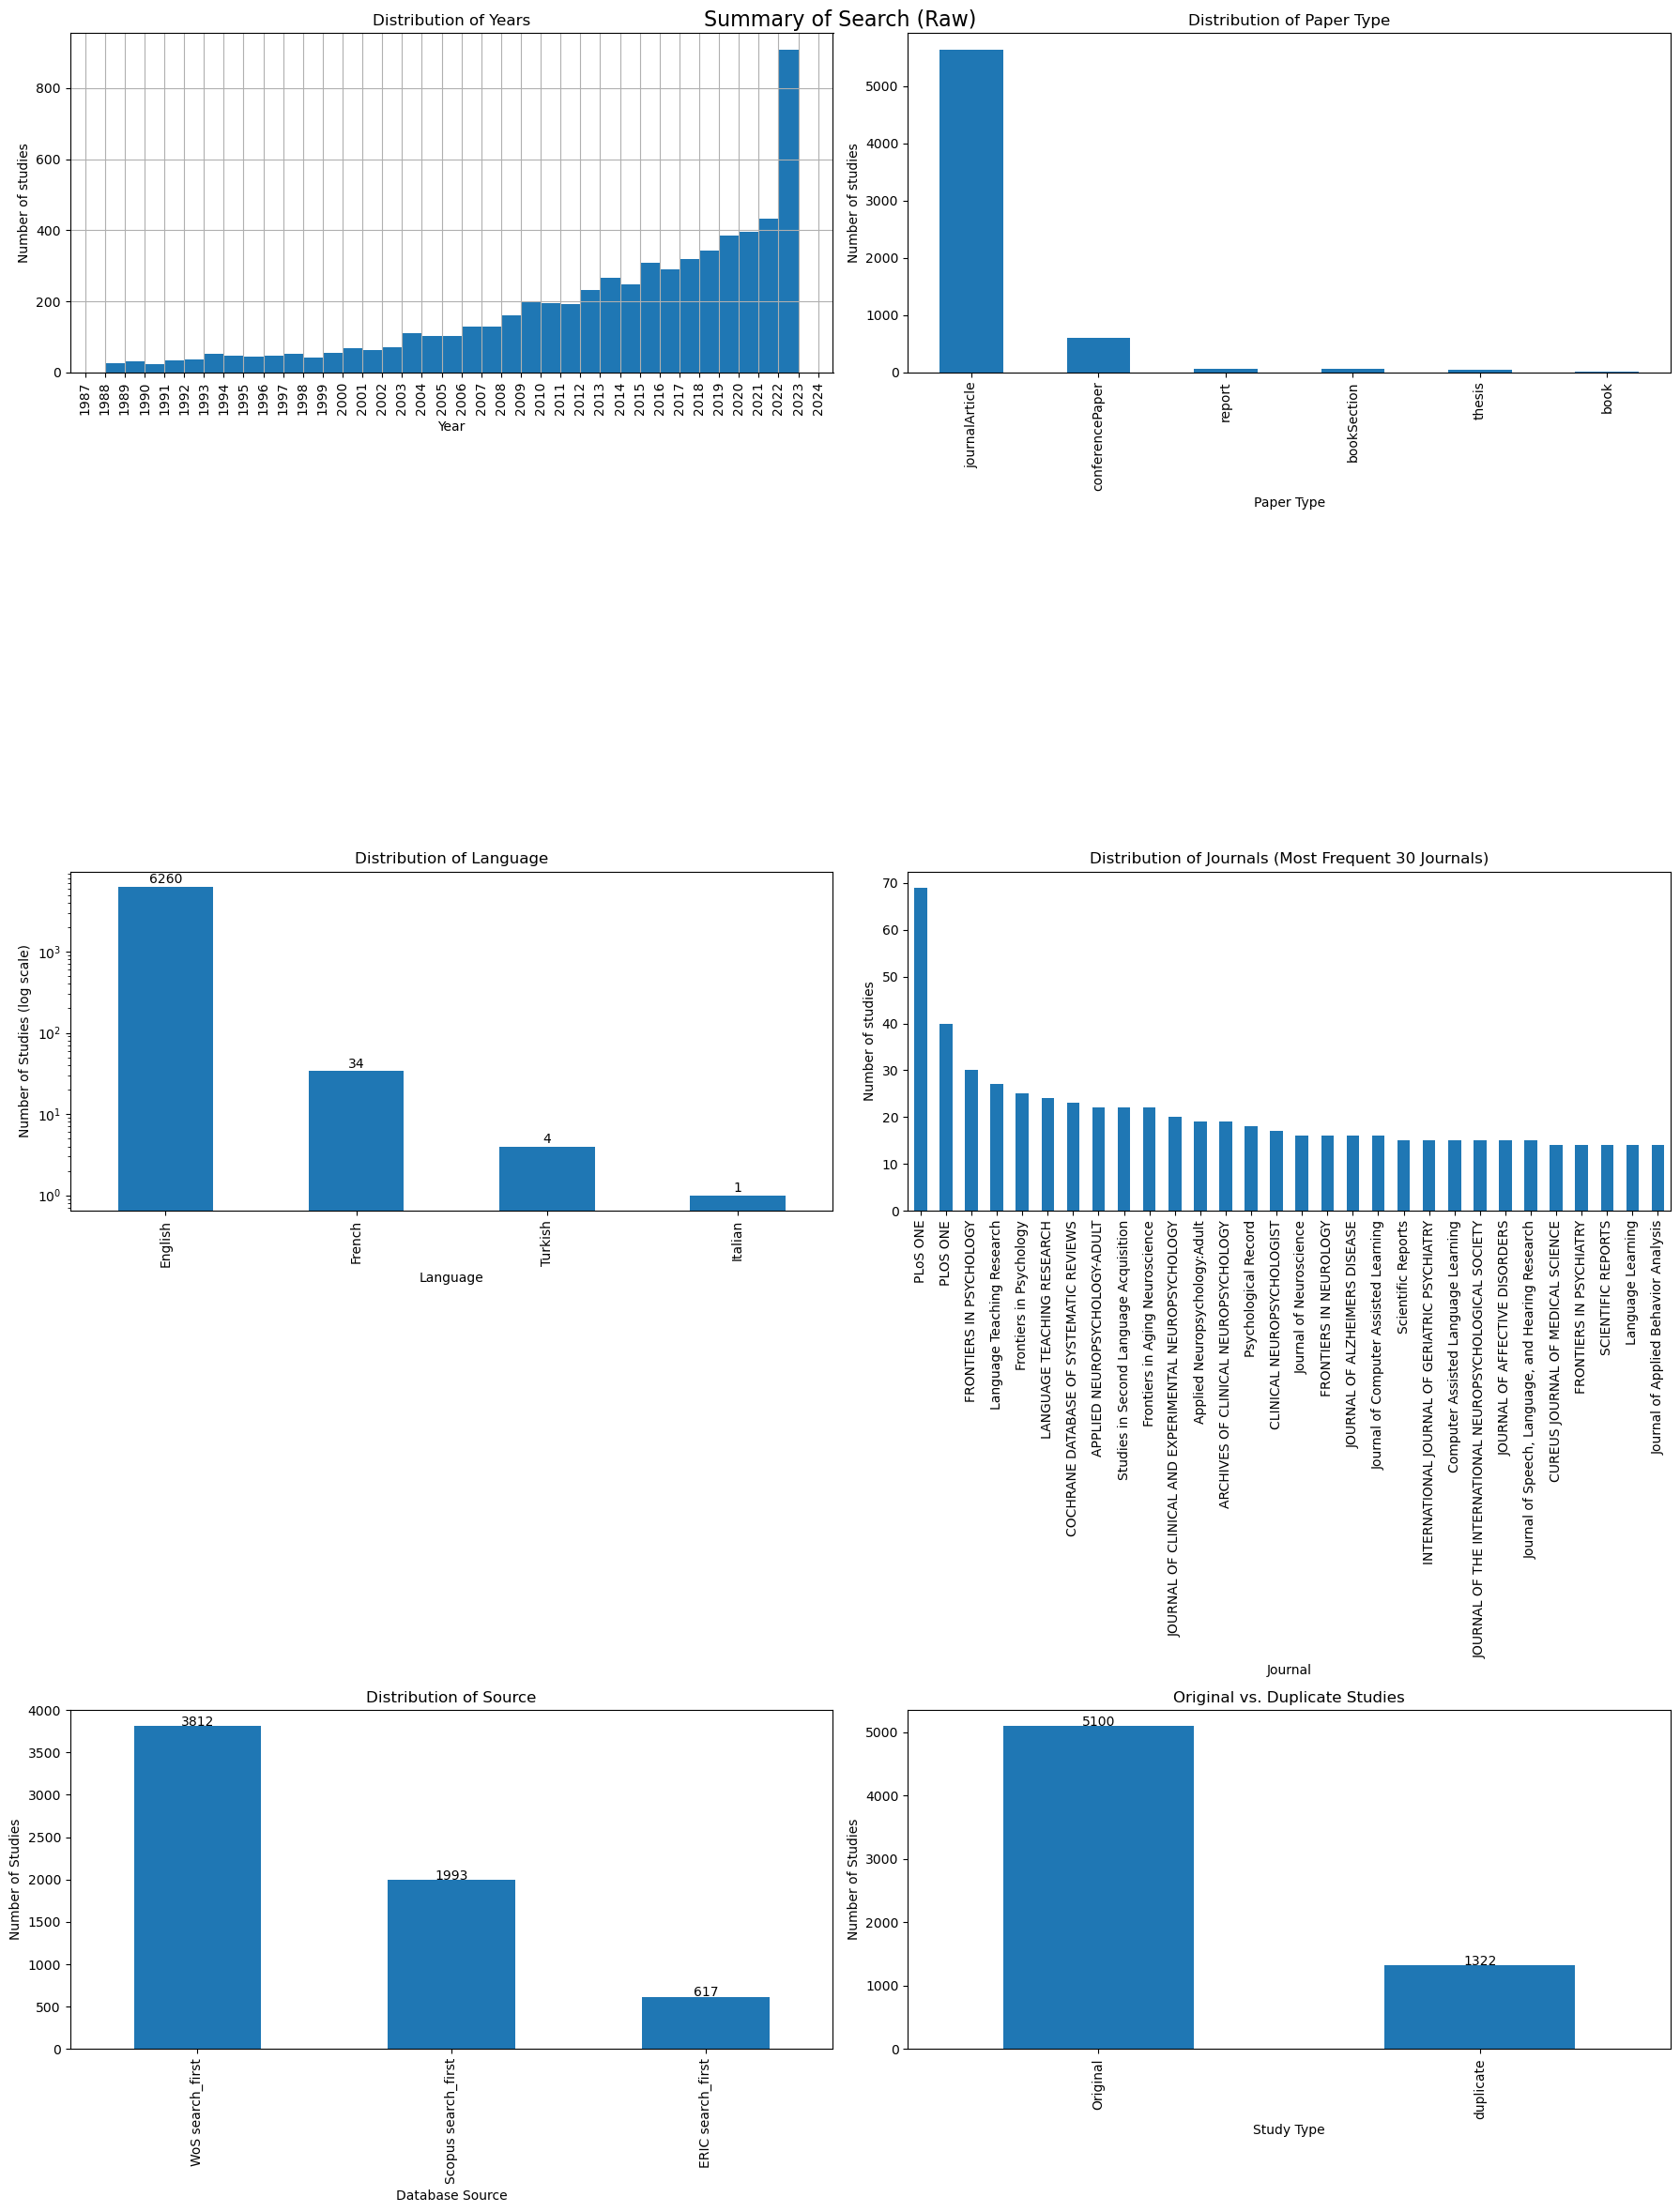

In [29]:
# eliminate the years that are not numeric
relevant_studies_df = relevant_studies_df[relevant_studies_df['Year'].str.isnumeric()]
# convert the years to integers
relevant_studies_df['Year'] = relevant_studies_df['Year'].astype(int)

# how many studies are we looking at? (number of rows), print as ' Number of studies: ...'
print('Number of studies:', relevant_studies_df.shape[0])
# how many unique Journal 
print('Number of unique Journal:', relevant_studies_df['Journal'].nunique())

import matplotlib.pyplot as plt

# Assuming 'relevant_studies_df' is pre-loaded and properly formatted
fig, axs = plt.subplots(3, 2, figsize=(18, 24))  # Increase figsize if necessary

# Plot 1: Distribution of Years
relevant_studies_df['Year'].hist(bins=range(1988, 2024, 1), ax=axs[0, 0])
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of studies')
axs[0, 0].set_title('Distribution of Years')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].locator_params(axis='x', nbins=len(relevant_studies_df['Year'].unique()))

# Plot 2: Distribution of Paper Type
relevant_studies_df['Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Paper Type')
axs[0, 1].set_ylabel('Number of studies')
axs[0, 1].set_title('Distribution of Paper Type')

# Plot 3: Distribution of Language as a Bar Chart with Log Scale
language_counts = relevant_studies_df['Language'].value_counts()
language_counts.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Language')
axs[1, 0].set_ylabel('Number of Studies (log scale)')
axs[1, 0].set_title('Distribution of Language')
for i, v in enumerate(language_counts):
    axs[1, 0].text(i, v * 1.1, str(v), color='black', ha='center')

# Plot 4: Bar Plot of Top 30 Journals
top_30_journals = relevant_studies_df['Journal'].value_counts().head(30)
top_30_journals.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Journal')
axs[1, 1].set_ylabel('Number of studies')
axs[1, 1].set_title('Distribution of Journals (Most Frequent 30 Journals)')

# Plot 5: Bar Plot of Source
source_counts = relevant_studies_df['Source'].value_counts()
source_counts.plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_xlabel('Database Source')
axs[2, 0].set_ylabel('Number of Studies')
axs[2, 0].set_title('Distribution of Source')
for i, v in enumerate(source_counts):
    axs[2, 0].text(i, v + 5, str(v), color='black', ha='center')
    
# Plot 6: Duplicated Studies
# Find the '\nTitle Decision' = 'Duplicate' and count them and count the rest as 'Original'
duplicated_studies = relevant_studies_df['\nTitle Decision'].value_counts()
# count the rest as 'Original'
original_studies = relevant_studies_df.shape[0] - duplicated_studies['duplicate']
# plot the bar chart
pd.Series({'Original': original_studies, 'duplicate': duplicated_studies['duplicate']}).plot(kind='bar', ax=axs[2, 1])
axs[2, 1].set_xlabel('Study Type')
# Set the title of the plot
axs[2, 1].set_title('Original vs. Duplicate Studies')
axs[2, 1].set_ylabel('Number of Studies')
for i, v in enumerate([original_studies, duplicated_studies['duplicate']]):
    axs[2, 1].text(i, v + 5, str(v), color='black', ha='center')
    
# add a title to the entire figure
fig.suptitle('Summary of Search (Raw)', fontsize=16)

# Adjusting the layout to prevent overlap and make everything fit nicely
plt.tight_layout()

plt.show()

### 5.a.b- after removing duplicates

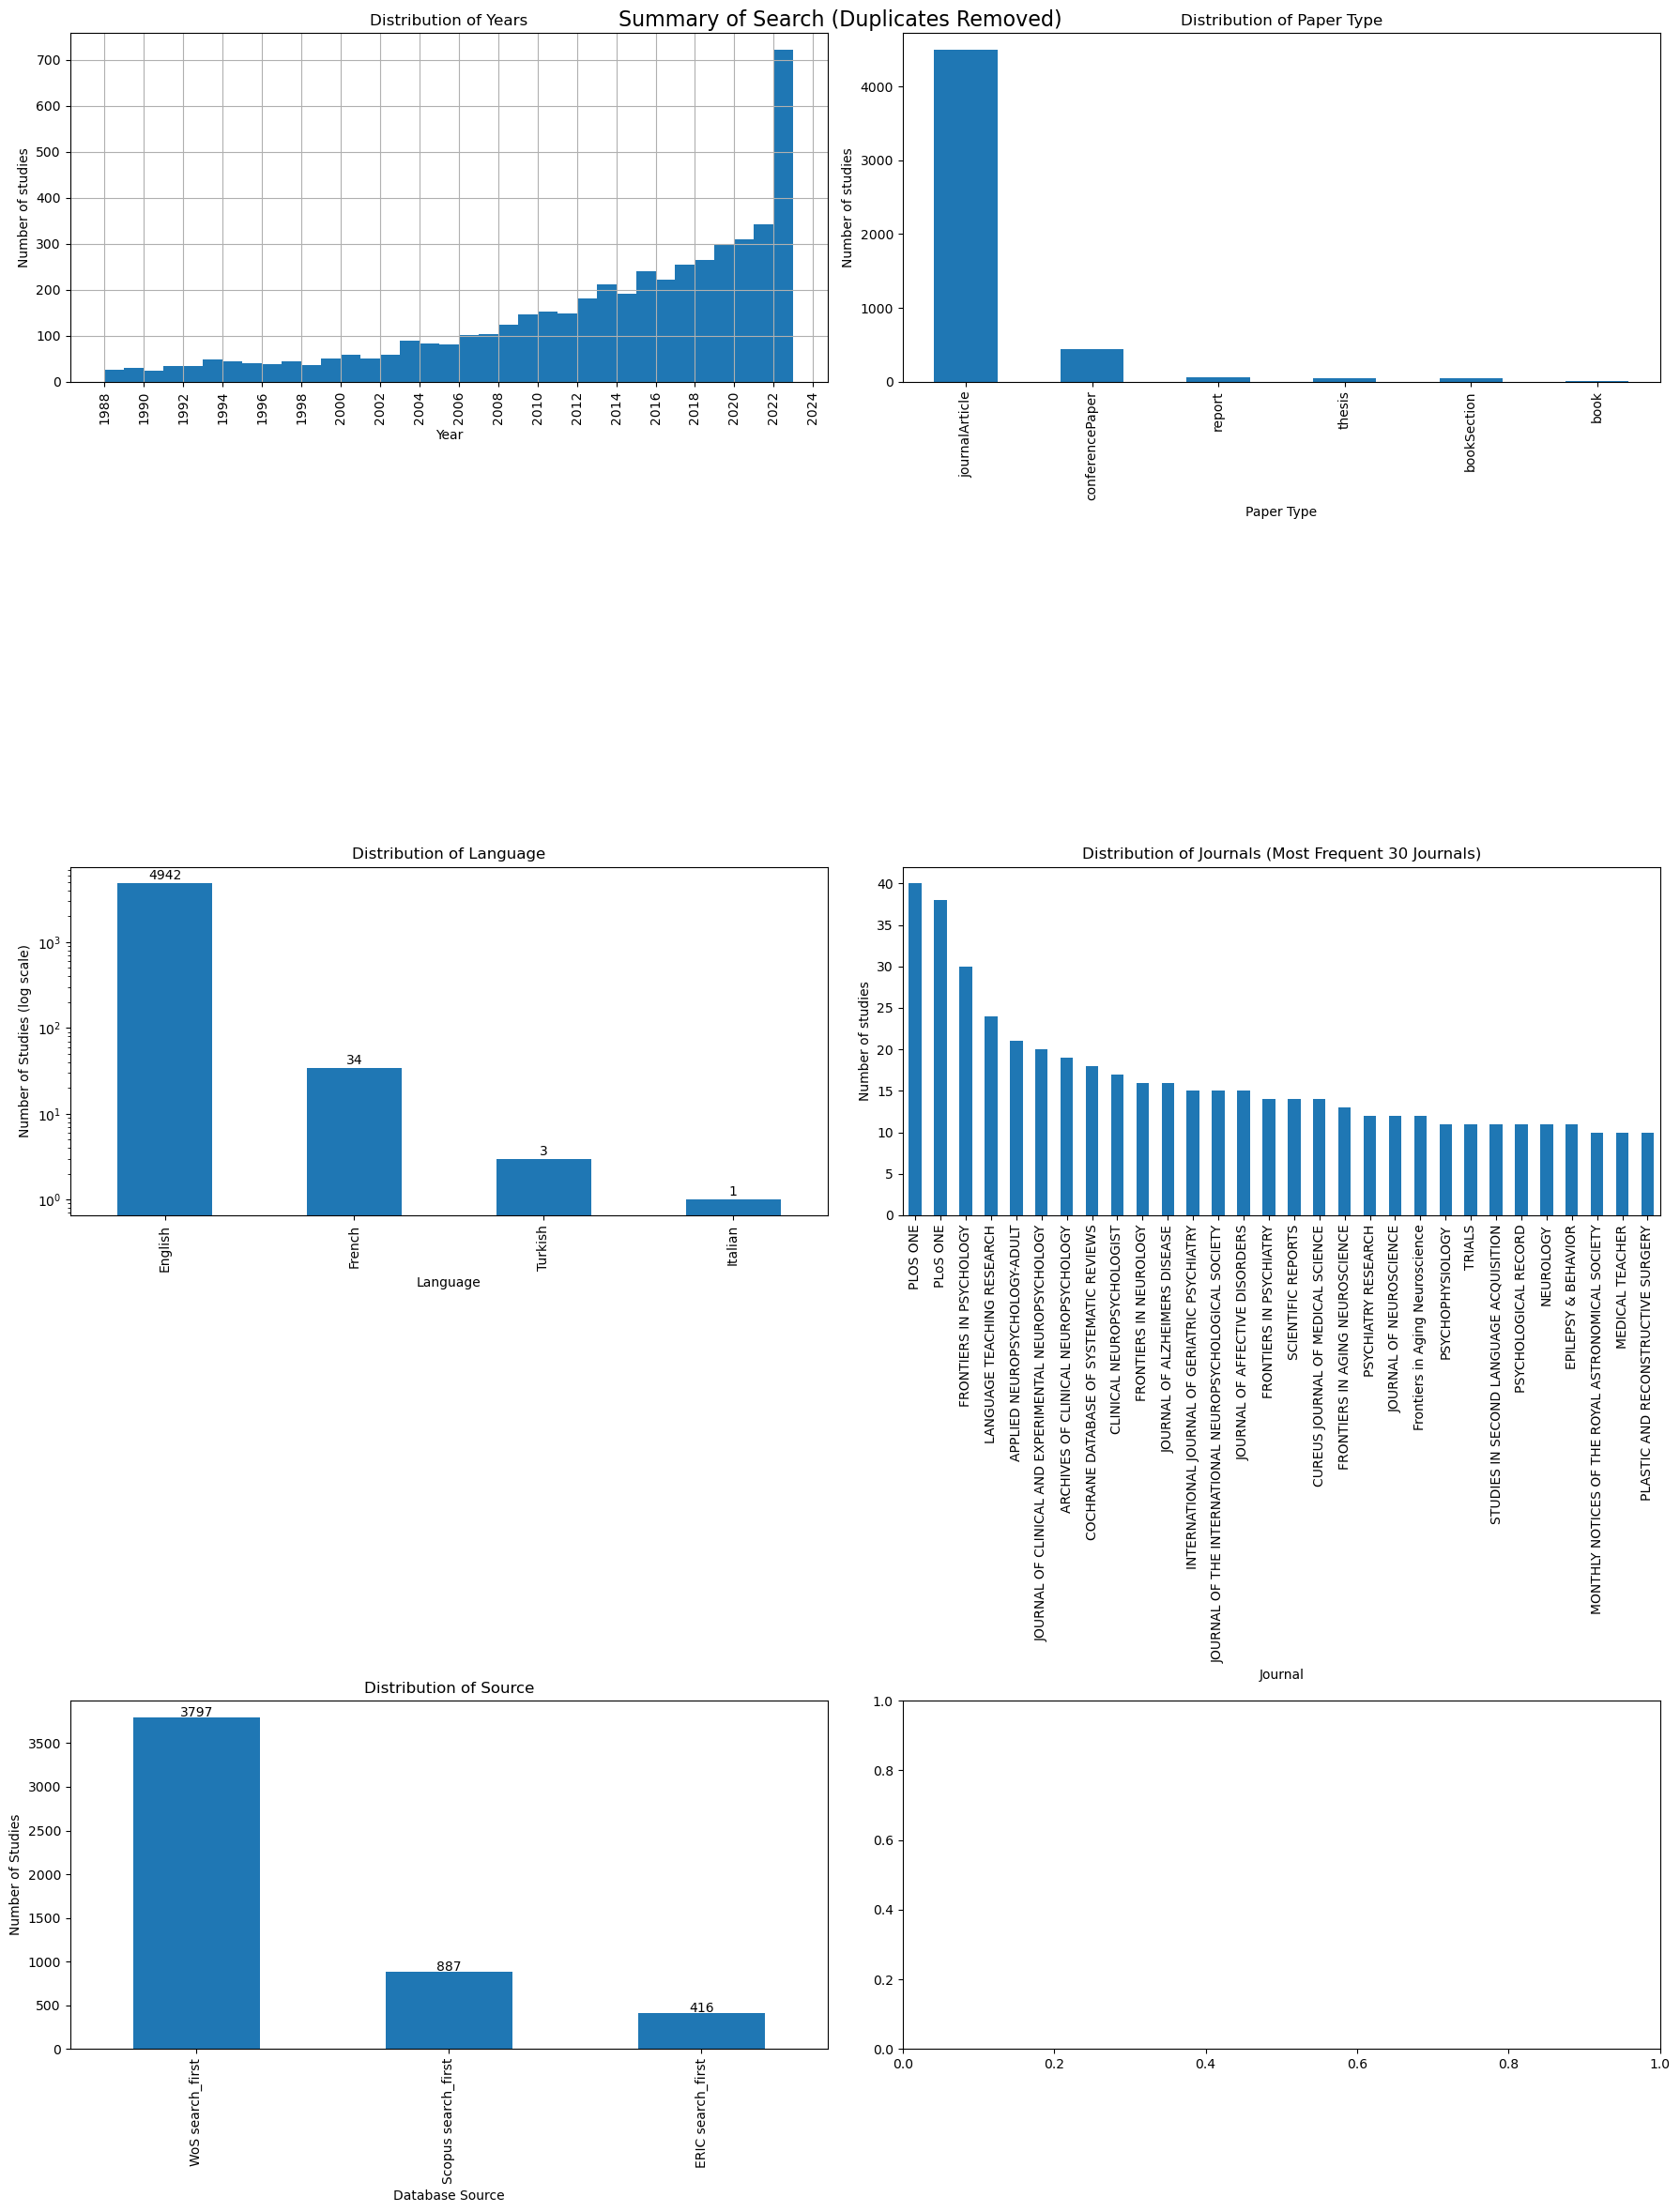

In [30]:
# limit the data into '\nTitle Decision' not 'duplicate' 
relevant_studies_df_duplicates_removed = relevant_studies_df[relevant_studies_df['\nTitle Decision'] != 'duplicate']

# Now make the same plots as before, but with the duplicates removed
fig, axs = plt.subplots(3, 2, figsize=(18, 24))  # Increase figsize if necessary

# Plot 1: Distribution of Years
relevant_studies_df_duplicates_removed['Year'].hist(bins=range(1988, 2024, 1), ax=axs[0, 0])
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of studies')
axs[0, 0].set_title('Distribution of Years')
axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 0].locator_params(axis='x', nbins=len(relevant_studies_df_duplicates_removed['Year'].unique()))

# Plot 2: Distribution of Paper Type
relevant_studies_df_duplicates_removed['Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Paper Type')
axs[0, 1].set_ylabel('Number of studies')
axs[0, 1].set_title('Distribution of Paper Type')

# Plot 3: Distribution of Language as a Bar Chart with Log Scale
language_counts = relevant_studies_df_duplicates_removed['Language'].value_counts()
language_counts.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Language')
axs[1, 0].set_ylabel('Number of Studies (log scale)')
axs[1, 0].set_title('Distribution of Language')
for i, v in enumerate(language_counts):
    axs[1, 0].text(i, v * 1.1, str(v), color='black', ha='center')

# Plot 4: Bar Plot of Top 30 Journals
top_30_journals = relevant_studies_df_duplicates_removed['Journal'].value_counts().head(30)
top_30_journals.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Journal')
axs[1, 1].set_ylabel('Number of studies')
axs[1, 1].set_title('Distribution of Journals (Most Frequent 30 Journals)')

# Plot 5: Bar Plot of Source
source_counts = relevant_studies_df_duplicates_removed['Source'].value_counts()
source_counts.plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_xlabel('Database Source')
axs[2, 0].set_ylabel('Number of Studies')
axs[2, 0].set_title('Distribution of Source')
for i, v in enumerate(source_counts):
    axs[2, 0].text(i, v + 5, str(v), color='black', ha='center')
    
# add a title to the entire figure
fig.suptitle('Summary of Search (Duplicates Removed)', fontsize=16)    

# Adjusting the layout to prevent overlap and make everything fit nicely
plt.tight_layout()

plt.show()

## 5.b- Title+Abstract Screening Decisions

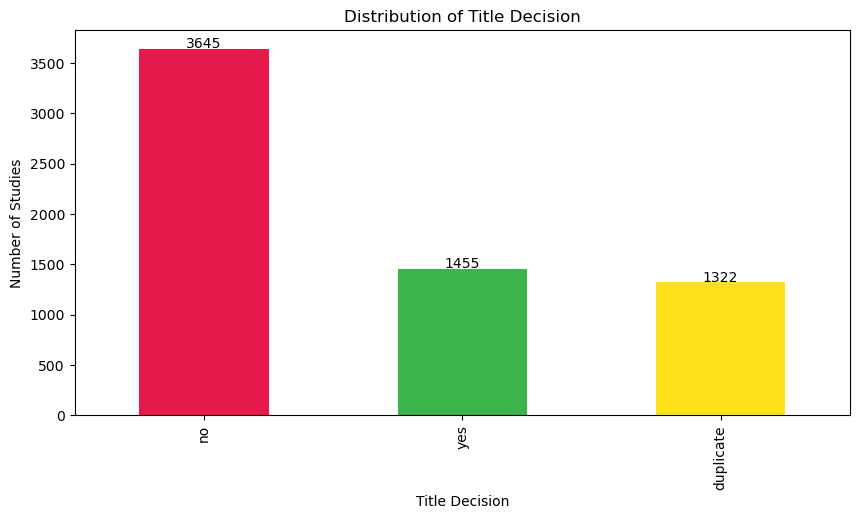

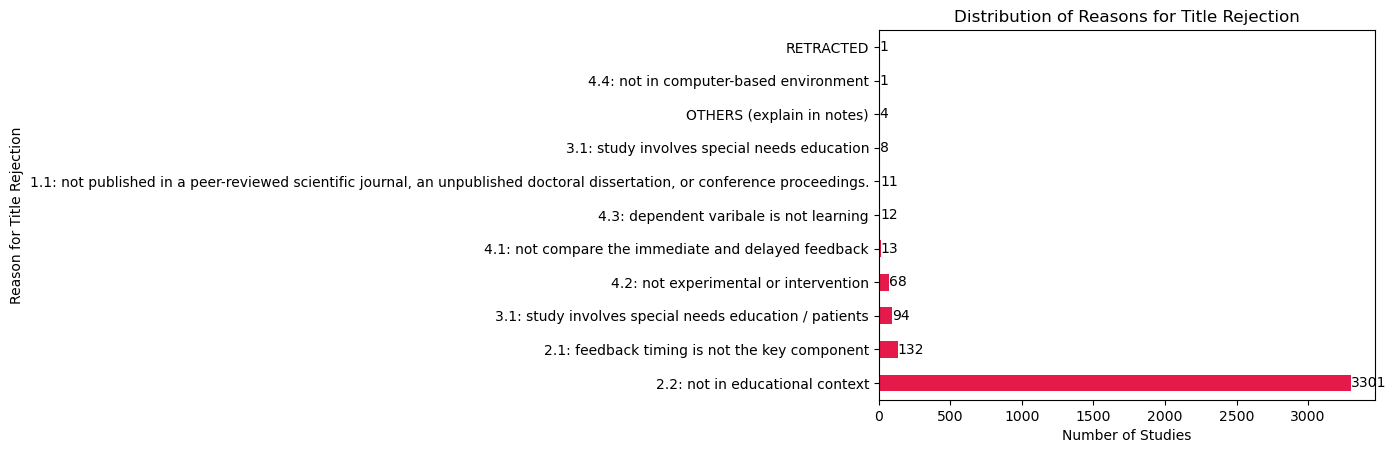

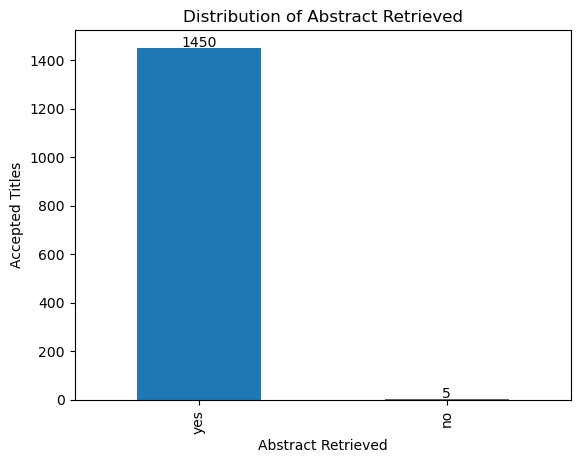

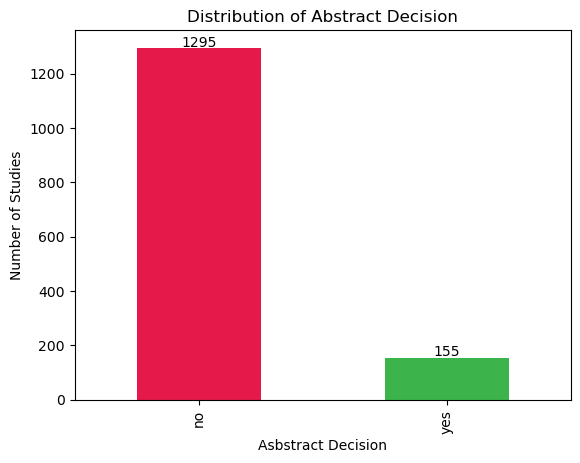

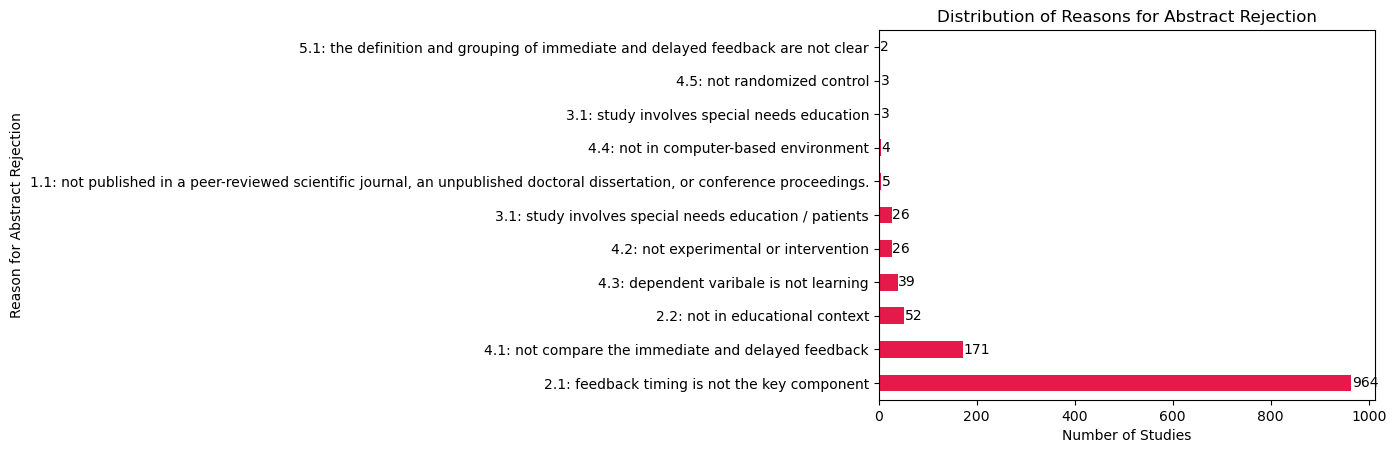

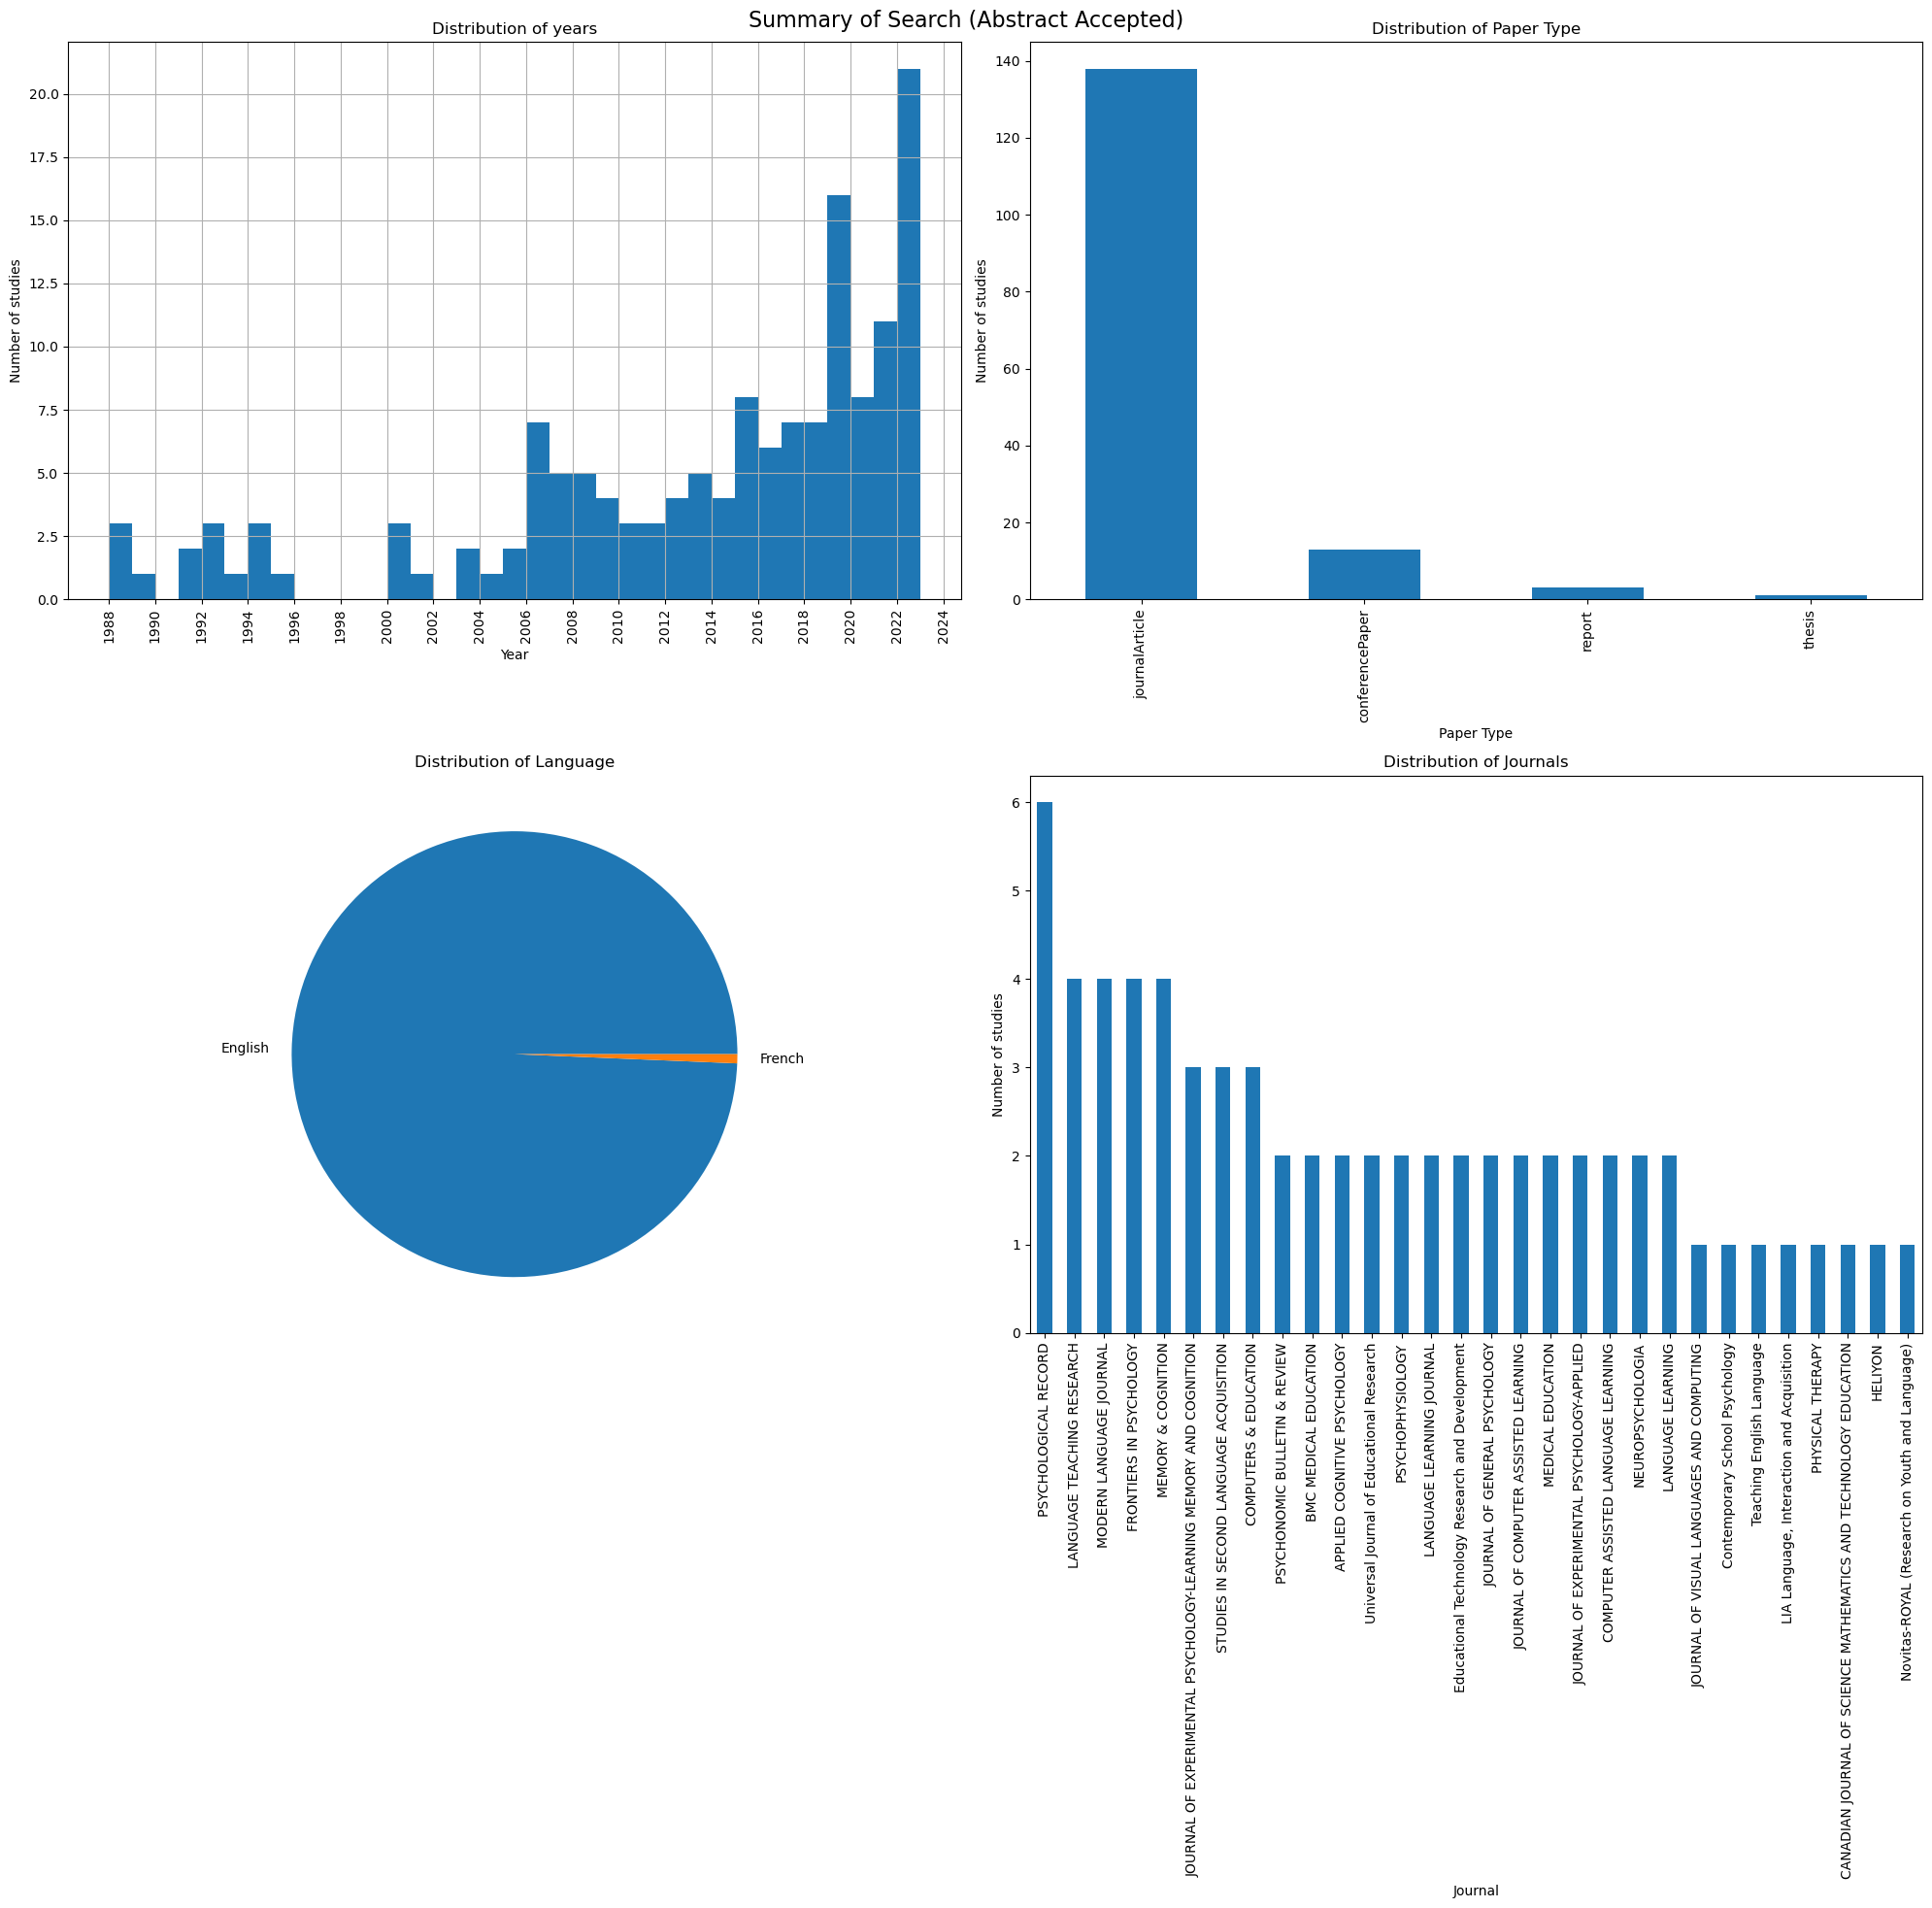

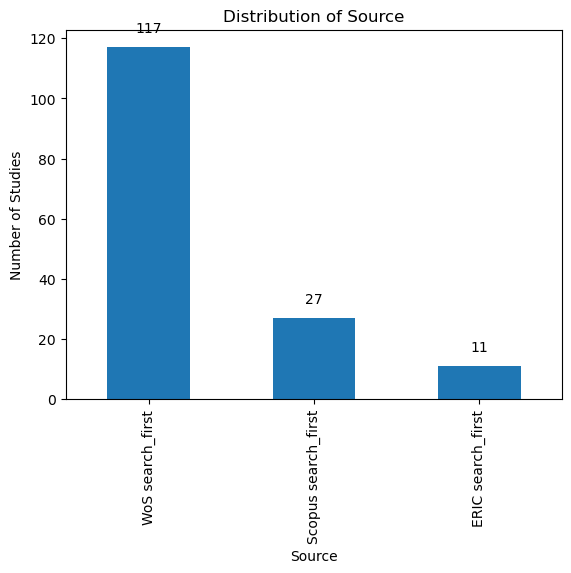

In [31]:

title_decision_counts = relevant_studies_df["\nTitle Decision"].value_counts()
# Set professional colors (more muted tones)
colors = ['#e6194b', '#3cb44b', '#ffe119']  # Red, green, yellow in more muted tones
# Create the bar plot
title_decision_counts.plot(kind='bar', color=colors, figsize=(10, 5))
plt.xlabel('Title Decision')
plt.ylabel('Number of Studies')
plt.title('Distribution of Title Decision')
# Add text labels on the bars
for i, v in enumerate(title_decision_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
plt.show()

# limit the data to only the rows where the Title Decision is 'no'
relevant_studies_df_title_rejected = relevant_studies_df[relevant_studies_df['\nTitle Decision'] == 'no']

# limit the data to only the rows where the Title Decision is 'no'
title_rejected_reason_counts = relevant_studies_df_title_rejected['If no, reason?'].value_counts()

# Create a horizontal bar plot with the specified red color
title_rejected_reason_counts.plot(kind='barh', color='#e6194b')
plt.xlabel('Number of Studies')
plt.ylabel('Reason for Title Rejection')
plt.title('Distribution of Reasons for Title Rejection')

# Add numbers on the bars
for i, v in enumerate(title_rejected_reason_counts):
    plt.text(v + 1, i, str(v), color='black', ha='left', va='center')

plt.show()


# now limit the data to only the rows where the Title Decision is 'yes'
relevant_studies_df_title_accepted = relevant_studies_df[relevant_studies_df['\nTitle Decision'] == 'yes']
# from the new data, get the counts of Abstract_retrieved and plot it with the numbers also on the bars
abstract_retrieved_counts = relevant_studies_df_title_accepted['Abstract_retrieved'].value_counts()
abstract_retrieved_counts.plot(kind='bar')
plt.xlabel('Abstract Retrieved')
plt.ylabel('Accepted Titles')
plt.title('Distribution of Abstract Retrieved')
for i, v in enumerate(abstract_retrieved_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
plt.show()

# limit the data to only the rows where the Abstract_retrieved is 'yes'
relevant_studies_df_abstract_retrieved = relevant_studies_df_title_accepted[relevant_studies_df_title_accepted['Abstract_retrieved'] == 'yes']
# plot bar plot of this relevant_studies_df_abstract_retrieved data with the numbers on the bars and same colors
abstract_accepted_counts = relevant_studies_df_abstract_retrieved['Abstract_screening_decision1'].value_counts()
abstract_accepted_counts.plot(kind='bar', color=colors)
plt.xlabel('Asbstract Decision')
plt.ylabel('Number of Studies')
plt.title('Distribution of Abstract Decision')
for i, v in enumerate(abstract_accepted_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
    
plt.show()

# limit the relevant_studies_df_abstract_retrieved into the rows where the Abstract_screening_decision1 is 'no'
relevant_studies_df_abstract_rejected = relevant_studies_df_abstract_retrieved[relevant_studies_df_abstract_retrieved['Abstract_screening_decision1'] == 'no']

# limit the relevant_studies_df_abstract_retrieved into the rows where the Abstract_screening_decision1 is 'no'
abstract_rejected_reason_counts = relevant_studies_df_abstract_rejected['If no, reason?'].value_counts()
# Create a horizontal bar plot
abstract_rejected_reason_counts.plot(kind='barh', color='#e6194b')
plt.xlabel('Number of Studies')
plt.ylabel('Reason for Abstract Rejection')
plt.title('Distribution of Reasons for Abstract Rejection')
# Add numbers on the bars for clarity
for i, v in enumerate(abstract_rejected_reason_counts):
    plt.text(v + 1, i, str(v), color='black', va='center')
plt.show()
    

# now limit the data to only the rows where the Abstract_screening_decision1 is 'yes'
relevant_studies_df_abstract_accepted = relevant_studies_df_abstract_retrieved[relevant_studies_df_abstract_retrieved['Abstract_screening_decision1'] == 'yes']
# from the new data, get the counts of Year, Type, Language and Journal and Source counts and plot them in one figure
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
relevant_studies_df_abstract_accepted['Year'].hist(bins=range(1988, 2024, 1), ax=axs[0, 0])
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of studies')
axs[0, 0].set_title('Distribution of years')
axs[0, 0].locator_params(axis='x', nbins=len(relevant_studies_df_abstract_accepted['Year'].unique()))
# rotate the x labels
axs[0, 0].tick_params(axis='x', rotation=90)
relevant_studies_df_abstract_accepted['Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Paper Type')
axs[0, 1].set_ylabel('Number of studies')
axs[0, 1].set_title('Distribution of Paper Type')
relevant_studies_df_abstract_accepted['Language'].value_counts().plot(kind='pie', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
axs[1, 0].set_title('Distribution of Language')
journal_counts = relevant_studies_df_abstract_accepted['Journal'].value_counts()
top_30_journals = journal_counts.head(30)
top_30_journals.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Journal')
axs[1, 1].set_ylabel('Number of studies')
axs[1, 1].set_title('Distribution of Journals')

# add a title to the entire figure
fig.suptitle('Summary of Search (Abstract Accepted)', fontsize=16)

# put a distance between the top and bottom plots
plt.tight_layout()
plt.show()

# from the new data, get the counts of Source and plot it with the numbers also on the bars
source_counts = relevant_studies_df_abstract_accepted['Source'].value_counts()
source_counts.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Number of Studies')
plt.title('Distribution of Source')
for i, v in enumerate(source_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
plt.show()


## 5.c- Full Text Review Decisions


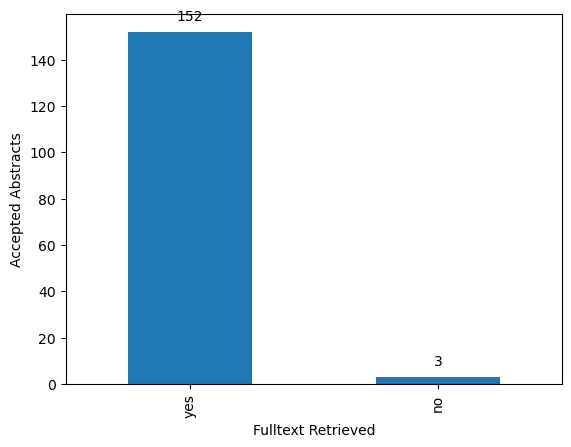

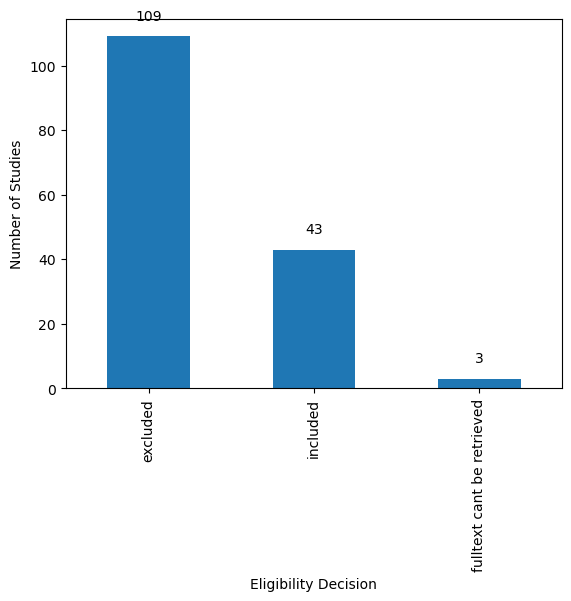

In [32]:
# in relevant_studies_df_abstract_accepted if the Fulltext_retrieved is blank replace it with 'not checked yet'
relevant_studies_df_abstract_accepted['Fulltext_retrieved'] = relevant_studies_df_abstract_accepted['Fulltext_retrieved'].fillna('not checked yet')

# in relevant_studies_df_abstract_accepted give a bar plot of the counts of  Fulltext_retrieved with the numbers on the bars
fulltext_retrieved_counts = relevant_studies_df_abstract_accepted['Fulltext_retrieved'].value_counts()

fulltext_retrieved_counts.plot(kind='bar')
plt.xlabel('Fulltext Retrieved')
plt.ylabel('Accepted Abstracts')
#plt.title('Distribution of Fulltext Retrieved')
for i, v in enumerate(fulltext_retrieved_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
plt.show()


# in relevant_studies_df_abstract_accepted give a bar plot of the counts of Eligibility_decision with the numbers on the bars and if its blank replace it with 'not read yet'
relevant_studies_df_abstract_accepted['Eligibility_decision'] = relevant_studies_df_abstract_accepted['Eligibility_decision'].fillna('not read yet')
# if yes replace it with 'included', if no replace it with 'excluded'
relevant_studies_df_abstract_accepted['Eligibility_decision'] = relevant_studies_df_abstract_accepted['Eligibility_decision'].replace('yes', 'included').replace('no', 'excluded')
# if the Fulltext_retrieved is no replace the Eligibility_decision with 'fulltext cant be retrieved'
relevant_studies_df_abstract_accepted.loc[relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'no', 'Eligibility_decision'] = 'fulltext cant be retrieved'
eligibility_decision_counts = relevant_studies_df_abstract_accepted['Eligibility_decision'].value_counts()
eligibility_decision_counts.plot(kind='bar')
plt.xlabel('Eligibility Decision')
plt.ylabel('Number of Studies')
#plt.title('Distribution of Eligibility Decision')
for i, v in enumerate(eligibility_decision_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
plt.show()


## 5.d- Other Sources

In [33]:
# relevant_studies_df = Source is 'WoS search_first' or 'Scopus search_first' or 'ERIC search_first'
other_sources = data_all[(data_all['Source'] == 'Reverse_search_Eligible_papers') | (data_all['Source'] == 'Reverse_search_reviews_meta') | (data_all['Source'] == 'Search_engine_alert')]

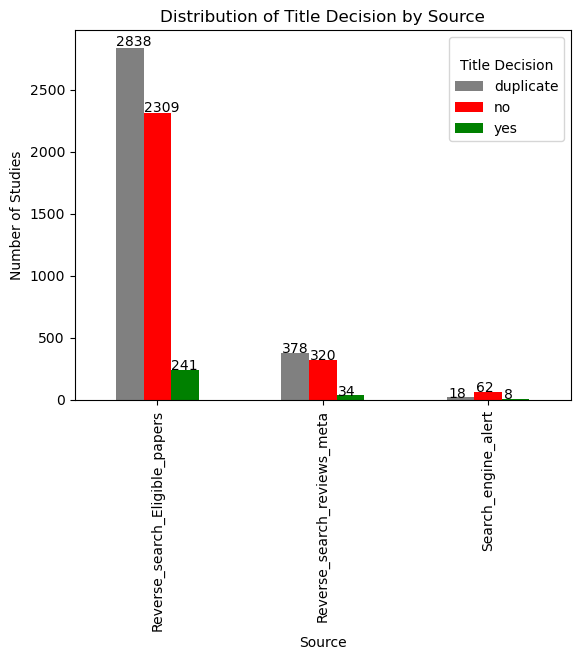

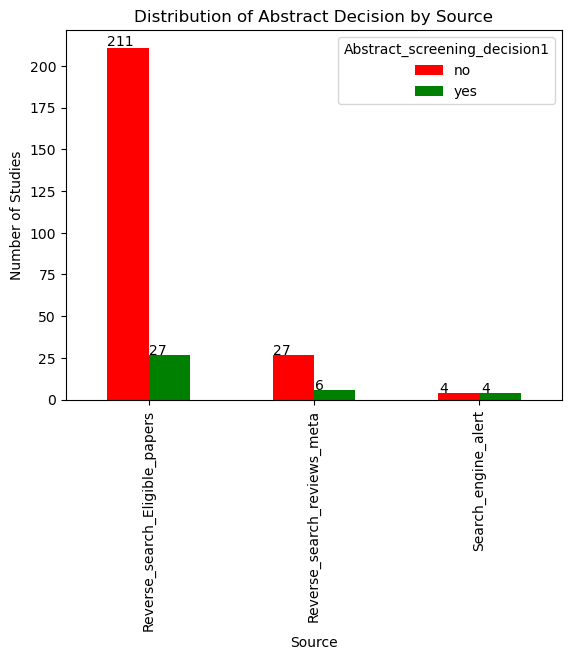

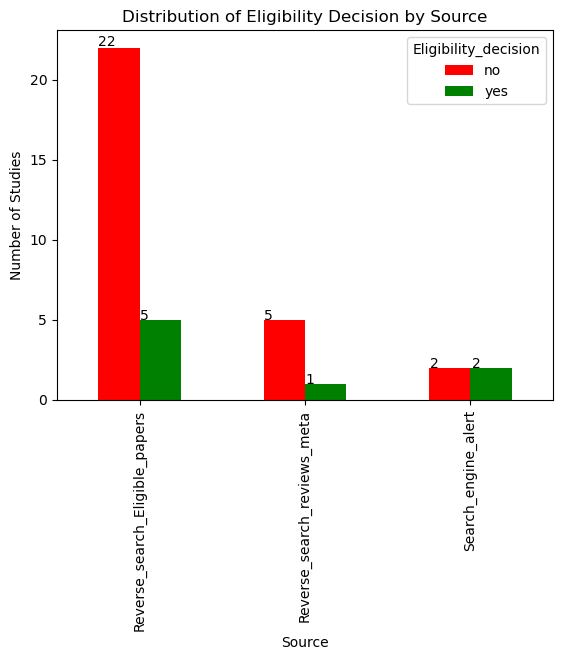

Number of studies included from other sources: 8


In [34]:
## Title

import matplotlib.pyplot as plt

# Define custom colors for each category
colors = {
    'yes': 'green',
    'no': 'red',
    'duplicate': 'gray'
}

# Generate the counts of Title Decision per Source
source_title_decision_counts = other_sources.groupby('Source')['\nTitle Decision'].value_counts().unstack()

# Plot the bar plot with sub-bars for each Title Decision category and apply colors
ax = source_title_decision_counts.plot(kind='bar', stacked=False, color=[colors.get(col, 'blue') for col in source_title_decision_counts.columns])

# Set labels and title
plt.xlabel('Source')
plt.ylabel('Number of Studies')
plt.title('Distribution of Title Decision by Source')

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()

## Abstract

# abstract_screened_other_sources= where \nTitle Decision is yes
abstract_screened_other_sources = other_sources[other_sources['\nTitle Decision'] == 'yes']

# from the abstract_screened_other_sources, get the counts of Abstract_screening_decision1 per Source
source_abstract_decision_counts = abstract_screened_other_sources.groupby('Source')['Abstract_screening_decision1'].value_counts().unstack()

# Plot the bar plot with sub-bars for each Abstract Decision category
ax = source_abstract_decision_counts.plot(kind='bar', stacked=False, color=[colors.get(col, 'blue') for col in source_abstract_decision_counts.columns])

# Set labels and title
plt.xlabel('Source')
plt.ylabel('Number of Studies')
plt.title('Distribution of Abstract Decision by Source')

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
    
# Show the plot
plt.show()

## Full text

# fulltext_retrieved_other_sources= where Abstract_screening_decision1  is yes
fulltext_retrieved_other_sources = abstract_screened_other_sources[abstract_screened_other_sources['Abstract_screening_decision1'] == 'yes']

# from the fulltext_retrieved_other_sources, get the counts of Eligibility_decision
source_eligibility_decision_counts = fulltext_retrieved_other_sources.groupby('Source')['Eligibility_decision'].value_counts().unstack()

# Plot the bar plot with sub-bars for each Eligibility Decision category
ax = source_eligibility_decision_counts.plot(kind='bar', stacked=False, color=[colors.get(col, 'blue') for col in source_eligibility_decision_counts.columns])

# Set labels and title
plt.xlabel('Source')
plt.ylabel('Number of Studies')
plt.title('Distribution of Eligibility Decision by Source')

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))
    
# Show the plot
plt.show()



# in total how many studies where Eligibility_decision= yes in the fulltext_retrieved_other_sources print it
print('Number of studies included from other sources:', fulltext_retrieved_other_sources[fulltext_retrieved_other_sources['Eligibility_decision'] == 'yes'].shape[0])



# 6- Infos for Prisma Flow Diagram

In [35]:
# Records identified through databases (and registers) = Source is 'WoS search_first' or 'Scopus search_first' or 'ERIC search_first' print
print('Number of records identified through databases (and registers):', relevant_studies_df.shape[0])

# count the Source of relevant_studies_df
print(relevant_studies_df['Source'].value_counts())

# Records removed before screening: Duplicate records = \nTitle Decision in relevant_studies_df is 'duplicate' print
print('Number of records removed before screening: Duplicate records:', relevant_studies_df[relevant_studies_df['\nTitle Decision'] == 'duplicate'].shape[0])

# Titles screened = \nTitle Decision in relevant_studies_df is either yes or no print
print('Number of titles screened:', relevant_studies_df[relevant_studies_df['\nTitle Decision'].isin(['yes', 'no'])].shape[0])

# Titles excluded = \nTitle Decision in relevant_studies_df is no print
print('Number of titles excluded:', relevant_studies_df[relevant_studies_df['\nTitle Decision'] == 'no'].shape[0])

# Abstracts screened = relevant_studies_df_title_accepted where Abstract_retrieved= yes
print('Number of abstracts screened:', relevant_studies_df_title_accepted[relevant_studies_df_title_accepted['Abstract_retrieved'] == 'yes'].shape[0])

# Abstracts not available = relevant_studies_df_title_accepted where Abstract_retrieved= no
print('Number of abstracts not available:', relevant_studies_df_title_accepted[relevant_studies_df_title_accepted['Abstract_retrieved'] == 'no'].shape[0])

# Abstracts excluded = relevant_studies_df_abstract_rejected    
print('Number of abstracts excluded:', relevant_studies_df_abstract_rejected.shape[0])

# Reasons for abstracts rejection = If no, reason? count for each category
print('Reasons for abstracts rejection:')
print(relevant_studies_df_abstract_rejected['If no, reason?'].value_counts())

# Full-text articles sought for retrieval = relevant_studies_df_abstract_accepted where Fulltext_retrieved= yes or no
print('Number of full-text articles sought for retrieval:', relevant_studies_df_abstract_accepted[relevant_studies_df_abstract_accepted['Fulltext_retrieved'].isin(['yes', 'no'])].shape[0])

# Full text not available= relevant_studies_df_abstract_accepted where Fulltext_retrieved= no
print('Number of full-text articles not available:', relevant_studies_df_abstract_accepted[relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'no'].shape[0])

# Full-text articles assessed for eligibility = relevant_studies_df_abstract_accepted where Fulltext_retrieved= yes
print('Number of full-text articles assessed for eligibility:', relevant_studies_df_abstract_accepted[relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'yes'].shape[0])

# Full-text articles excluded = relevant_studies_df_abstract_accepted where Fulltext_retrieved= yes and Eligibility_decision= no
print('Number of full-text articles excluded:', relevant_studies_df_abstract_accepted[(relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'yes') & (relevant_studies_df_abstract_accepted['Eligibility_decision'] == 'excluded')].shape[0])

# Full-text articles included = relevant_studies_df_abstract_accepted where Fulltext_retrieved= yes and Eligibility_decision= yes
print('Number of full-text articles included:', relevant_studies_df_abstract_accepted[(relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'yes') & (relevant_studies_df_abstract_accepted['Eligibility_decision'] == 'included')].shape[0])

# included from other sources = fulltext_retrieved_other_sources where Eligibility_decision= yes
print('Number of studies included from other sources:', fulltext_retrieved_other_sources[fulltext_retrieved_other_sources['Eligibility_decision'] == 'yes'].shape[0])
print('Number of studies excluded from other sources:', fulltext_retrieved_other_sources[fulltext_retrieved_other_sources['Eligibility_decision'] == 'no'].shape[0])

# total number of studies included = relevant_studies_df_abstract_accepted where Fulltext_retrieved= yes and Eligibility_decision= yes + included from other sources
print('Total number of studies included:', relevant_studies_df_abstract_accepted[(relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'yes') & (relevant_studies_df_abstract_accepted['Eligibility_decision'] == 'included')].shape[0] + fulltext_retrieved_other_sources[fulltext_retrieved_other_sources['Eligibility_decision'] == 'yes'].shape[0])


Number of records identified through databases (and registers): 6422
WoS search_first       3812
Scopus search_first    1993
ERIC search_first       617
Name: Source, dtype: int64
Number of records removed before screening: Duplicate records: 1322
Number of titles screened: 5100
Number of titles excluded: 3645
Number of abstracts screened: 1450
Number of abstracts not available: 5
Number of abstracts excluded: 1295
Reasons for abstracts rejection:
2.1: feedback timing is not the key component                                                                                 964
4.1: not compare the immediate and delayed feedback                                                                           171
2.2: not in educational context                                                                                                52
4.3: dependent varibale is not learning                                                                                        39
4.2: not experimental or int

In [36]:
# count the Source of fulltext_retrieved_other_sources
fulltext_retrieved_other_sources['Source'].value_counts()


Reverse_search_Eligible_papers    27
Reverse_search_reviews_meta        6
Search_engine_alert                4
Name: Source, dtype: int64

# 7- Included Papers Descriptive Stats

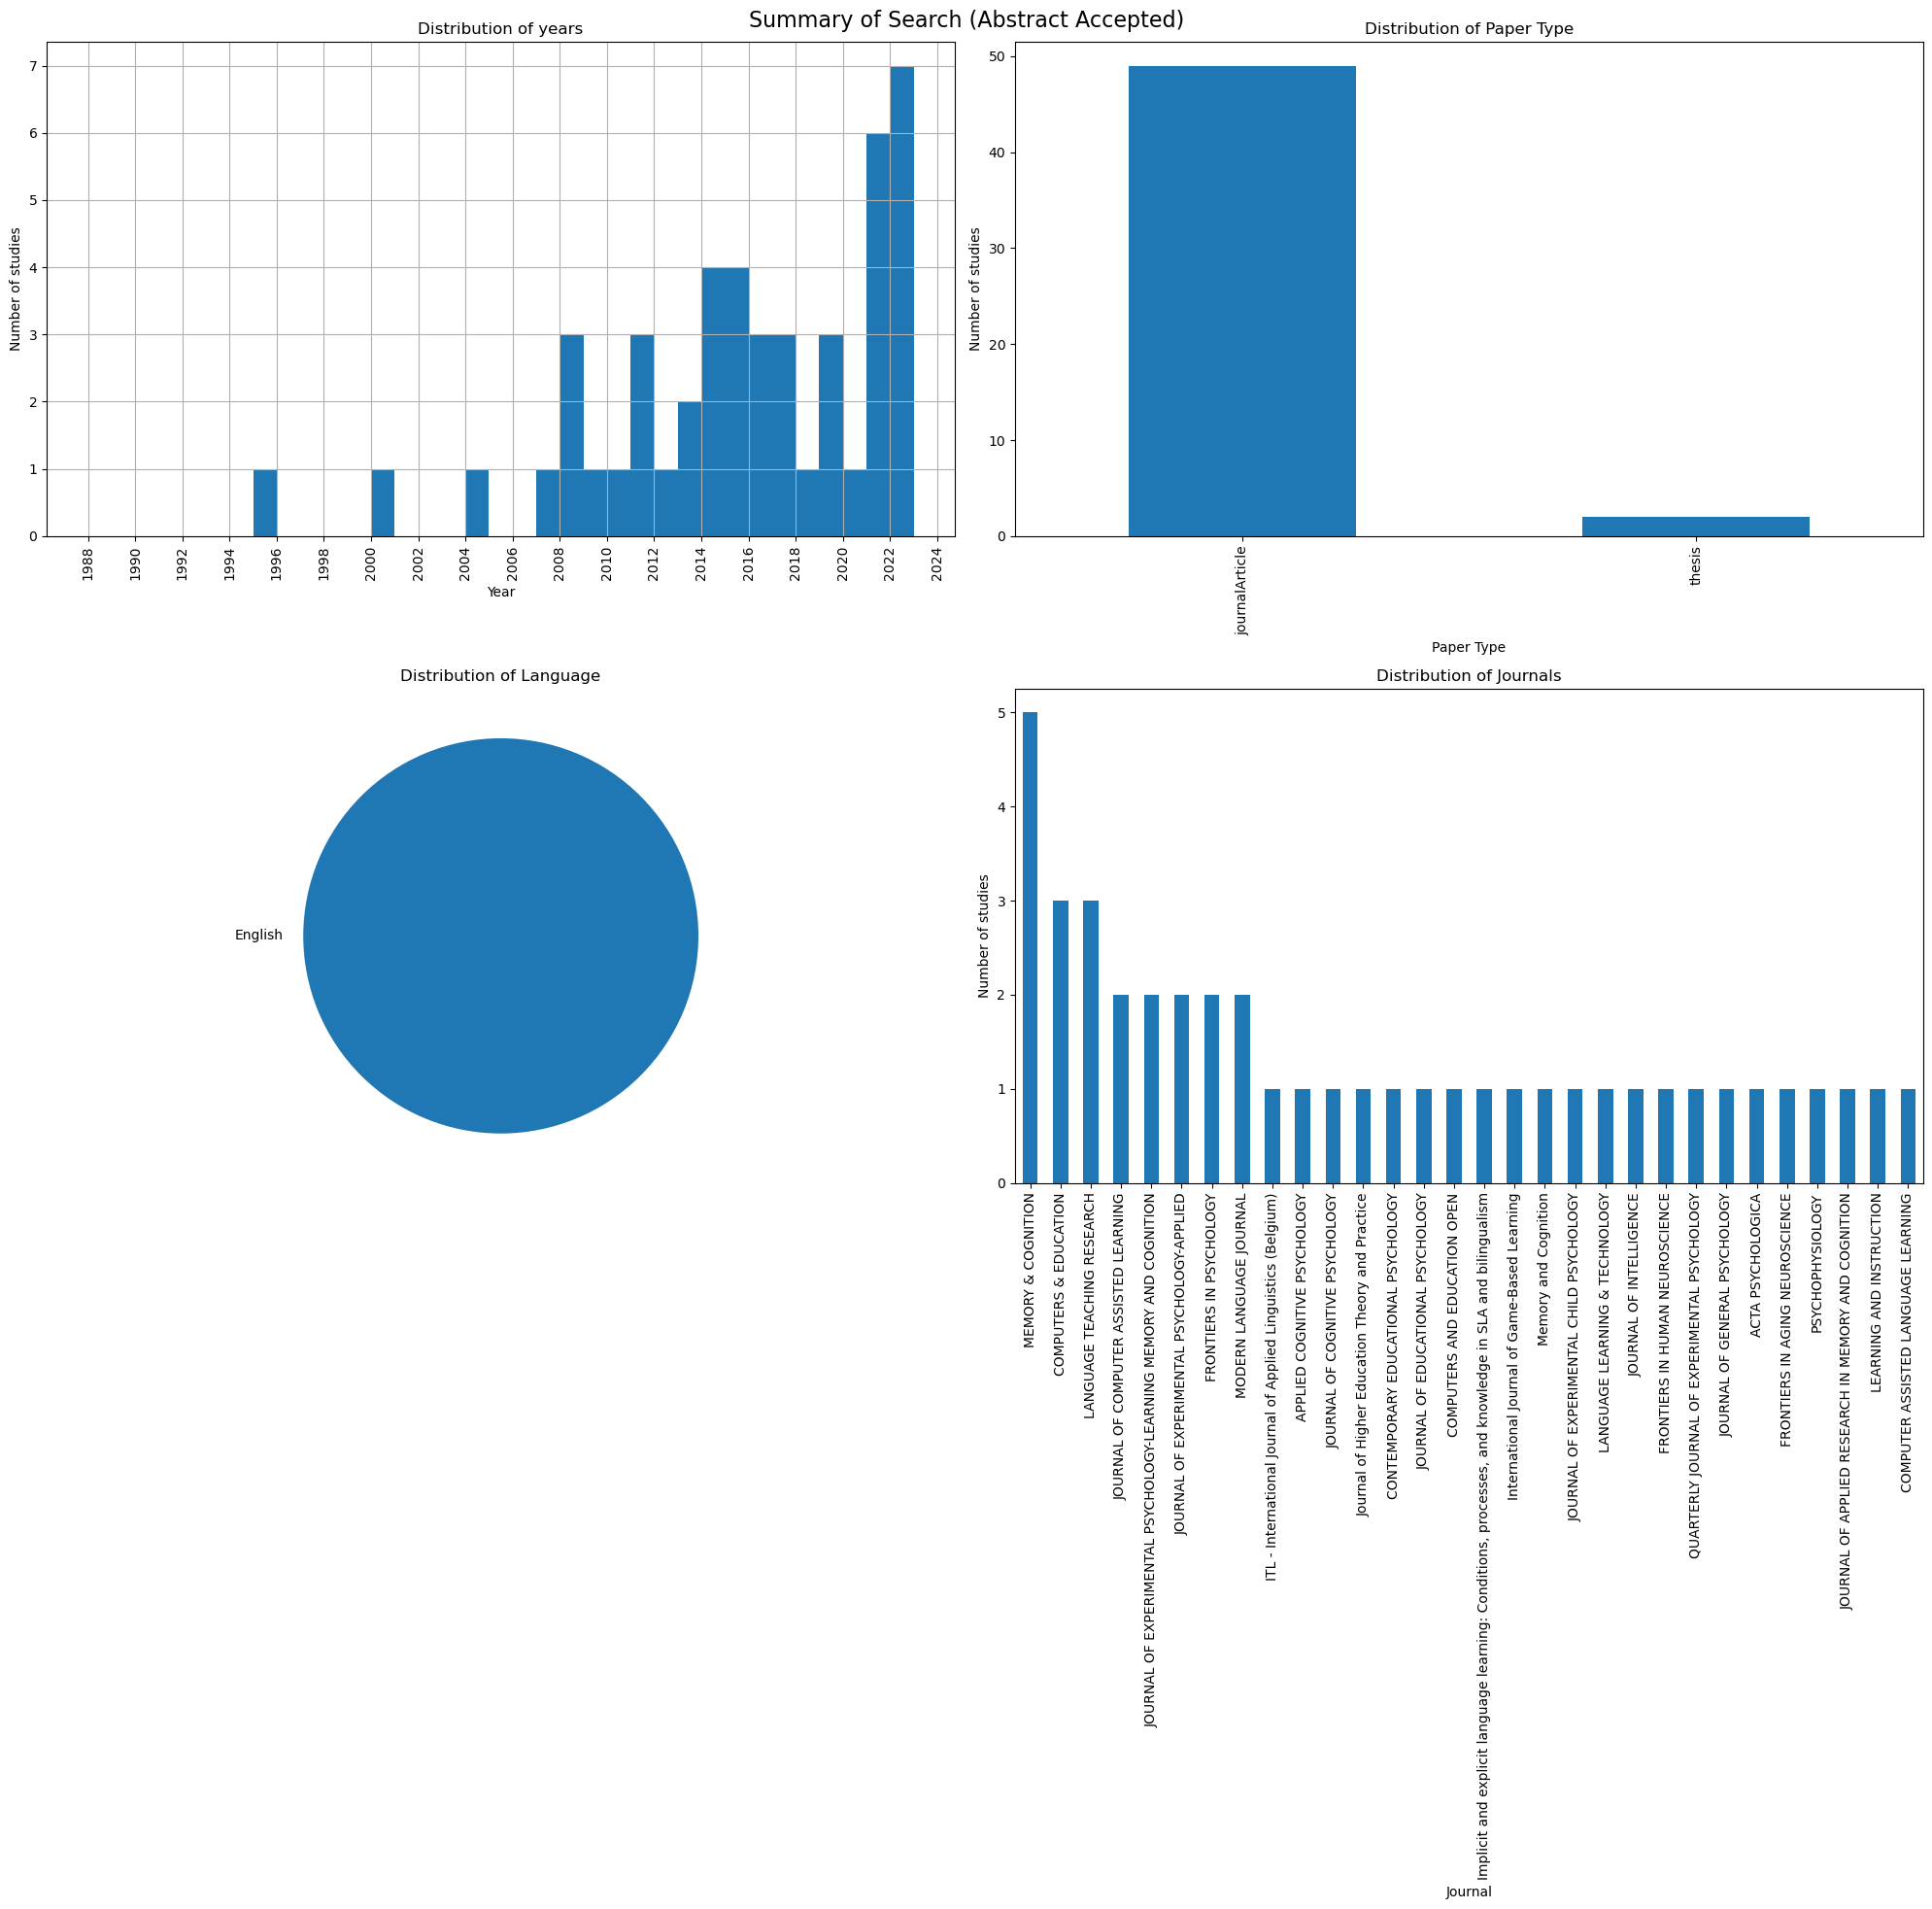

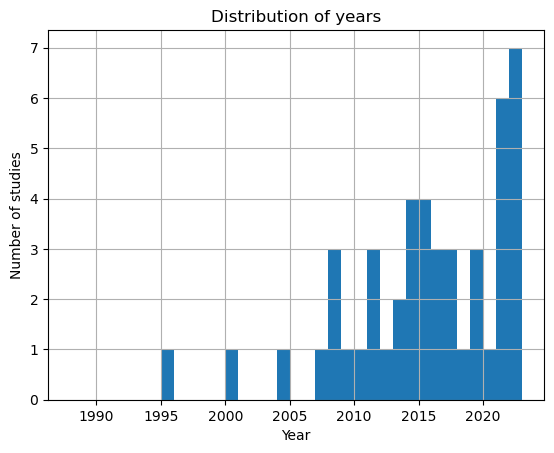

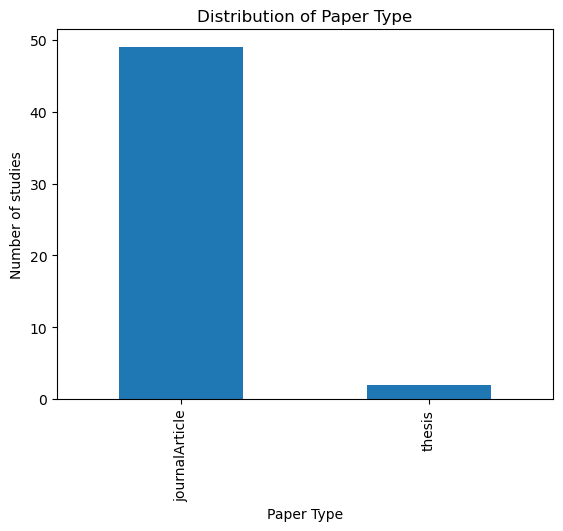

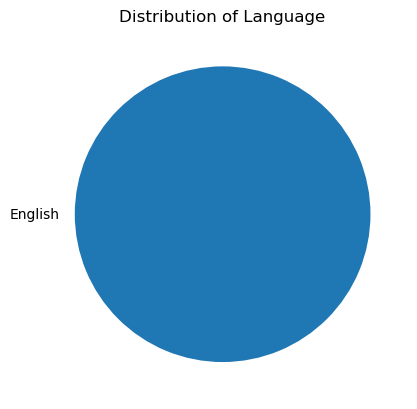

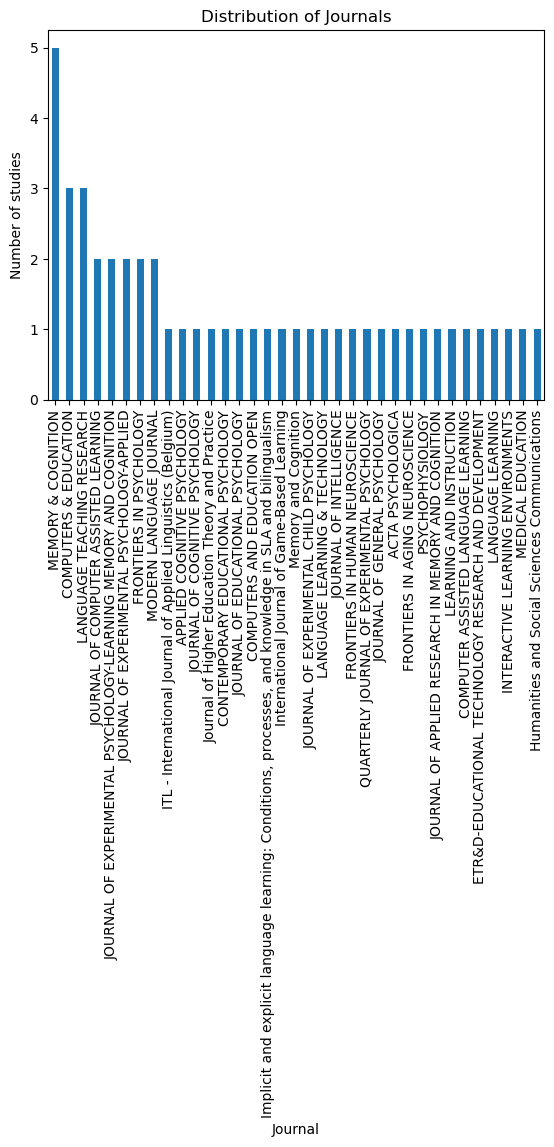

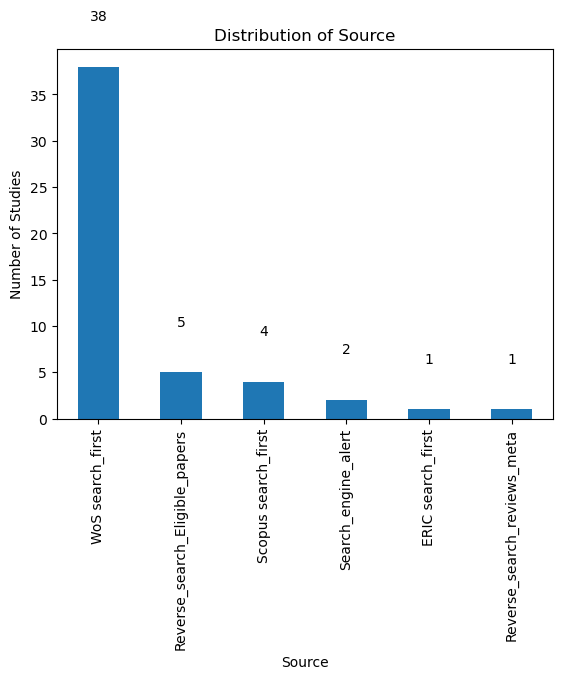

In [37]:
# all_included_studies = relevant_studies_df_abstract_accepted where Fulltext_retrieved= yes and Eligibility_decision= yes + included from other sources
all_included_studies = pd.concat([relevant_studies_df_abstract_accepted[(relevant_studies_df_abstract_accepted['Fulltext_retrieved'] == 'yes') & (relevant_studies_df_abstract_accepted['Eligibility_decision'] == 'included')], fulltext_retrieved_other_sources[fulltext_retrieved_other_sources['Eligibility_decision'] == 'yes']])

# turn year into integer
all_included_studies['Year'] = all_included_studies['Year'].astype(int)

# from the new data, get the counts of Year, Type, Language and Journal and Source counts and plot them in one figure
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
all_included_studies['Year'].hist(bins=range(1988, 2024, 1), ax=axs[0, 0])
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Number of studies')
axs[0, 0].set_title('Distribution of years')
axs[0, 0].locator_params(axis='x', nbins=len(all_included_studies['Year'].unique()))
# rotate the x labels
axs[0, 0].tick_params(axis='x', rotation=90)
all_included_studies['Type'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Paper Type')
axs[0, 1].set_ylabel('Number of studies')
axs[0, 1].set_title('Distribution of Paper Type')
all_included_studies['Language'].value_counts().plot(kind='pie', ax=axs[1, 0])
axs[1, 0].set_ylabel('')
axs[1, 0].set_title('Distribution of Language')
journal_counts = all_included_studies['Journal'].value_counts()
top_30_journals = journal_counts.head(30)
top_30_journals.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Journal')
axs[1, 1].set_ylabel('Number of studies')
axs[1, 1].set_title('Distribution of Journals')

# add a title to the entire figure
fig.suptitle('Summary of Search (Abstract Accepted)', fontsize=16)

# put a distance between the top and bottom plots
plt.tight_layout()
plt.show()


# plots seperatelt
# from the new data, get the counts of Year and plot it
all_included_studies['Year'].hist(bins=range(1988, 2024, 1))
plt.xlabel('Year')
plt.ylabel('Number of studies')
plt.title('Distribution of years')
plt.show()

# from the new data, get the counts of Type and plot it
all_included_studies['Type'].value_counts().plot(kind='bar')
plt.xlabel('Paper Type')
plt.ylabel('Number of studies')
plt.title('Distribution of Paper Type')
plt.show()

# from the new data, get the counts of Language and plot it with a pie chart
all_included_studies['Language'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.title('Distribution of Language')
plt.show()

# from the new data, get the counts of Journal and plot it with the numbers also on the bars
journal_counts = all_included_studies['Journal'].value_counts()
# include all journals in the plot
journal_counts.plot(kind='bar')
plt.xlabel('Journal')
plt.ylabel('Number of studies')
plt.title('Distribution of Journals')
plt.show()

# from the new data, get the counts of Source and plot it with the numbers also on the bars
source_counts = all_included_studies['Source'].value_counts()
source_counts.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Number of Studies')
plt.title('Distribution of Source')
for i, v in enumerate(source_counts):
    plt.text(i, v + 5, str(v), color='black', ha='center')
plt.show()
